# Data Preprocessing

Il dataset, prima di tutto, va opportunamente elaborato per occuparsi di eventuali dati duplicati o mancanti. Inoltre dovremo separare i dati per ottenere un training e un test set.
Gli step che seguiremo saranno i seguenti:
1. Caricare i dati
2. Gestire i dati mancanti
3. Eliminare le features ridondanti
4. Dividere il dataset in training e test set
5. Normalizzare e standardizzare i dati

### Definizione variabili

Per facilità d'utilizzo si esplicitano qui i `valori delle variabili` del modello.

In [ ]:
# Lunghezza percentuale del dataset di allenamento, il test è definito di conseguenza
len_percentage_train = 80 / 100

numero_di_features = 2
output_CNN_1 = 20
kernel_size_1 = 2

lunni = True

### Librerie

Allo stesso modo si inseriscono qui tutte le `librerie usate` per il progetto

In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Caricamento dei dati

Tramite `pandas` e il dataset fornito in .csv, carichiamo i dati all'interno di un dataset.

In [ ]:
import sys
import pandas as pd

IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    if lunni:
        fer2013 = pd.read_csv('/content/drive/My Drive//Università//Deep Learning//emotion-cnn//files//fer2013.csv') # LUNNI
    else:
        fer2013 = pd.read_csv('/content/drive/My Drive//Università//Deep Learning//emotion-cnn//files//fer2013.csv') # GIAN
else:
    fer2013 = pd.read_csv('files/fer2013.csv')
fer2013

Mounted at /content/drive


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


### Eliminazione della colonna "Usage"

In [ ]:
print(list(fer2013.columns))
fer2013 = fer2013.drop(['Usage'], axis=1)
print(list(fer2013.columns))

['emotion', 'pixels', 'Usage']
['emotion', 'pixels']


### Da stringa di Pixels a List

In [ ]:
fer2013.pixels = fer2013.pixels.apply(lambda x: np.array(x.split(' ')).reshape(1, 48, 48).astype('float32') / 255)

### Salvo dataframe normalizzato

In [ ]:
if IN_COLAB:
    fer2013.to_pickle("/content/drive/My Drive//Università//Deep Learning//emotion-cnn//files//fer_norm.pkl")
else:
    fer2013.to_pickle("files/fer_norm.pkl")

### Carico dataframe normalizzato

In [ ]:
if IN_COLAB:
    fer2013 = pd.read_pickle("/content/drive/My Drive//Università//Deep Learning//emotion-cnn//files//fer_norm.pkl")
else:
    fer2013 = pd.read_pickle("files/fer_norm.pkl")

fer2013

,emotion,pixels
0,0,"[[[0.27450982, 0.3137255, 0.32156864, 0.282352..."
1,0,"[[[0.5921569, 0.5882353, 0.5764706, 0.60784316..."
2,2,"[[[0.90588236, 0.83137256, 0.6117647, 0.643137..."
3,4,"[[[0.09411765, 0.1254902, 0.14117648, 0.117647..."
4,6,"[[[0.015686275, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...
35882,6,"[[[0.19607843, 0.14117648, 0.06666667, 0.08627..."
35883,3,"[[[0.69803923, 0.68235296, 0.6745098, 0.678431..."
35884,0,"[[[0.06666667, 0.06666667, 0.0627451, 0.090196..."
35885,3,"[[[0.11764706, 0.10980392, 0.10980392, 0.11372..."


### Divisione del data set in training e test set

Si vuole dividere il data set in 2 parti:
1. Train set
2. Test set

In [ ]:
train_set, test_set = np.split(fer2013, [ int(len_percentage_train * len(fer2013)) ] )
test_set.reset_index(inplace=True, drop=True)

# Potrebbe essere un'idea dividire in proporizioni uguali le emozioni tra i sue set?

print("Lunghezza percentuale di:")
print("train_set {:.0%}".format( len(train_set) / len(fer2013) ))
print("test_set {:.0%}".format( len(test_set) / len(fer2013) ))

Lunghezza percentuale di:
train_set 80%
test_set 20%


### Creazione tensori e dataloader

In [ ]:
train_x, train_y = torch.tensor(train_set.pixels), torch.tensor(train_set.emotion)
test_x, test_y = torch.tensor(test_set.pixels), torch.tensor(test_set.emotion)

train_dataset = torch.utils.data.TensorDataset(train_x, train_y)
test_dataset = torch.utils.data.TensorDataset(test_x, test_y)

train_loader = torch.utils.data.DataLoader(train_dataset, shuffle=True, drop_last=True, batch_size=4)
test_loader = torch.utils.data.DataLoader(test_dataset, shuffle=True, drop_last=True, batch_size=4)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

torch.Size([28709, 1, 48, 48])
torch.Size([28709])
torch.Size([7178, 1, 48, 48])
torch.Size([7178])


### Mostrare le immagini

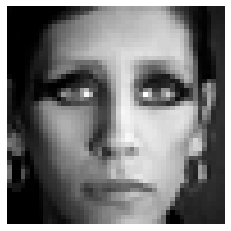

In [ ]:
def show(img):
    img = img * 255
    plt.axis("off")
    plt.imshow(img, cmap = 'gray')

show(fer2013.pixels[4][0])

# Modello con CNN

### VGG16 Schema

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20200219152327/conv-layers-vgg16.jpg" alt="drawing" width="500"/>

### Definizione del modello

In [ ]:
class Emotion_CNN(torch.nn.Module):
    def __init__(self):
        super(Emotion_CNN, self).__init__()
    
        self.cnn_layers = torch.nn.Sequential(
            # Defining a 2D convolution layer
            torch.nn.Conv2d(1, 4, kernel_size=5, stride=1, padding=1),
            torch.nn.BatchNorm2d(4),
            # Da guardare se inplace = True ha senso
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=3, stride=2),
            # Defining another 2D convolution layer
            torch.nn.Conv2d(4, 4, kernel_size=5, stride=1, padding=0),
            torch.nn.BatchNorm2d(4),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=3, stride=2),
        )
 
        self.linear_layers = torch.nn.Sequential(
            torch.nn.Linear(4 * (8 * 8), 10)
        )
 
    # Defining the forward pass    
    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x

[Sito da cui ho preso il modello successivo](https://www.analyticsvidhya.com/blog/2019/10/building-image-classification-models-cnn-pytorch/)

In [ ]:
# class Net(Module):   
#     def __init__(self):
#         super(Net, self).__init__()
#
#         self.cnn_layers = Sequential(
#             # Defining a 2D convolution layer
#             Conv2d(1, 4, kernel_size=3, stride=1, padding=1),
#             BatchNorm2d(4),
#             ReLU(inplace=True),
#             MaxPool2d(kernel_size=2, stride=2),
#             # Defining another 2D convolution layer
#             Conv2d(4, 4, kernel_size=3, stride=1, padding=1),
#             BatchNorm2d(4),
#             ReLU(inplace=True),
#             MaxPool2d(kernel_size=2, stride=2),
#         )
# 
#         self.linear_layers = Sequential(
#             Linear(4 * 7 * 7, 10)
#         )
# 
#     # Defining the forward pass    
#     def forward(self, x):
#         x = self.cnn_layers(x)
#         x = x.view(x.size(0), -1)
#         x = self.linear_layers(x)
#         return x

### Istanza del modello

Qua Lunni dobbiamo fare attenzione a `impostare il device in base all'ambiente` (Colab o locale)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Emotion_CNN().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
criterion = torch.nn.CrossEntropyLoss()
device

device(type='cuda')

### Definizione di Training e Validation

After building your model, you need to select a loss function (e.g. `cross entropy`), and an optimization module, along with a learning rate. Train and test your CNN model using the usual pipeline we have seen during the practical lessons.

In [ ]:
train_losses = []
valid_losses = []

def Train(epoca):
    running_loss = .0
    
    model.train()

    # valori_previsti_lista = []
    # valori_veri_lista = []

    for idx, (inputs,labels) in enumerate(train_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        
        preds = model(inputs.float())
        # preds = torch.squeeze(preds)
        # labels = torch.squeeze(labels)

        # valori_veri_lista.append((labels.detach().numpy() * standard_scaler.scale_[2]) + standard_scaler.mean_[2])
        # valori_previsti_lista.append((preds.detach().numpy() * standard_scaler.scale_[2]) + standard_scaler.mean_[2])

        loss = criterion(preds,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss

    # confronto = pd.DataFrame(np.array([valori_veri_lista, valori_previsti_lista]).transpose(), index=list(range(len(valori_veri_lista))), columns=['veri', 'predetti'])
    # confronto.to_csv("files/training_epoch_" + str(epoca) + ".csv")

    train_loss = running_loss/len(train_loader)
    train_losses.append(train_loss.detach().cpu().data.numpy())
    
    print(f'train_loss {train_loss}')
    
def Valid():
    running_loss = .0
    
    model.eval()
    
    with torch.no_grad():
        for idx, (inputs, labels) in enumerate(test_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            preds = model(inputs.float())
            # preds = torch.squeeze(preds)
            # labels = torch.squeeze(labels)
            loss = criterion(preds,labels)
            running_loss += loss
            
        valid_loss = running_loss/len(test_loader)
        valid_losses.append(valid_loss.detach().cpu().data.numpy())
        print(f'valid_loss {valid_loss}')

### Allenamento e Validazione del modello

In [ ]:
epochs = 50

for epoch in range(epochs):
    print('epochs {}/{}'.format(epoch+1,epochs))
    Train(epoch + 1)
    Valid()

epochs 1/50
train_loss 1.7020190954208374
valid_loss 1.600258708000183
epochs 2/50
train_loss 1.5662833452224731
valid_loss 1.5435820817947388
epochs 3/50
train_loss 1.5201505422592163
valid_loss 1.5174983739852905
epochs 4/50
train_loss 1.4919441938400269
valid_loss 1.4912396669387817
epochs 5/50
train_loss 1.4740238189697266
valid_loss 1.4885820150375366
epochs 6/50
train_loss 1.4589850902557373
valid_loss 1.470400094985962
epochs 7/50
train_loss 1.4507290124893188
valid_loss 1.4655166864395142
epochs 8/50
train_loss 1.4409042596817017
valid_loss 1.451535701751709
epochs 9/50
train_loss 1.433013677597046
valid_loss 1.4483728408813477
epochs 10/50
train_loss 1.4280552864074707
valid_loss 1.4381545782089233
epochs 11/50
train_loss 1.4221676588058472
valid_loss 1.448123574256897
epochs 12/50
train_loss 1.4189749956130981
valid_loss 1.430055022239685
epochs 13/50
train_loss 1.412966251373291
valid_loss 1.421934723854065
epochs 14/50
train_loss 1.4094866514205933
valid_loss 1.434962272644

### Visualizzazione grafico della loss

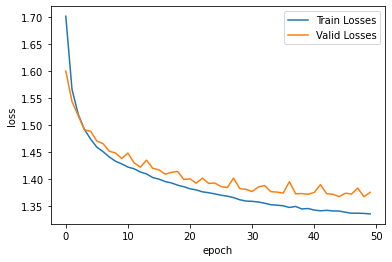

In [ ]:
loss_df = pd.DataFrame( {'Train Losses':train_losses, 'Valid Losses':valid_losses }, index=list(range(len(train_losses))) )

loss_df=loss_df.astype(float)

xs = loss_df.plot()
_ = xs.set_ylabel("loss")
_ = xs.set_xlabel("epoch")

### Salva stato del modello

In [ ]:
if IN_COLAB:
    torch.save(model.state_dict(), '/content/drive/My Drive/Università/Deep Learning/emotion-cnn/files/model_2021-12-08.pth')
else:
    torch.save(model.state_dict(), 'files/model_2021-12-08.pth')

### Carica stato del modello

In [ ]:
model.load_state_dict(torch.load('files/saved_state_of_model.pth'))

# Predizione e valutazione del modello

### Classificazione di Test

### Valutazione del modello

In [82]:
# Calculating the accuracy of the network on the whole dataset
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data # Getting the test data
        images, labels = images.cuda(), labels.cuda()
        outputs = model(images) # Getting the network output
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


Accuracy of the network on the 10000 test images: 47 %


In [81]:
# Calculating the accuracy of the network on each class of images
class_correct = list(0. for i in range(7))
class_total = list(0. for i in range(7))
classes = ("Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral")
with torch.no_grad():
    for data in test_loader:
        images, labels = data # Getting the test data
        images, labels = images.cuda(), labels.cuda()
        outputs = model(images) # Getting the network output
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(7):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of Angry : 23 %
Accuracy of Disgust :  5 %
Accuracy of  Fear : 31 %
Accuracy of Happy : 79 %
Accuracy of   Sad : 29 %
Accuracy of Surprise : 59 %
Accuracy of Neutral : 45 %
